<img src="https://storage.googleapis.com/gweb-uniblog-publish-prod/original_images/image1_hH9B4gs.jpg" alt="" />


# ***Assignment I - November 2022***
 *Ido Gazit, Rony Lupatin, Hemdat Lebel*

---
***Our goal is to predict the number of bicycles that were rented in each day of the testing set.*** 

## **Library Import**

In [1]:
# generals
import os
import pandas as pd
import numpy as np

# plots
import seaborn as sns
import matplotlib.pyplot as plt


# models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb


# hyperparameters tuning
from sklearn.model_selection import GridSearchCV

# model evalutation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## **Data import**

In [2]:
# importing the train data
train_data = pd.read_csv('https://github.com/odedovadia/AdvancedMLDLCourse/blob/main/Assignments/Assignment%20I/train.csv?raw=true')

# importing the test data
test_data = pd.read_csv('https://github.com/odedovadia/AdvancedMLDLCourse/blob/main/Assignments/Assignment%20I/test.csv?raw=true')

In [3]:
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,38
8160,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,149
8161,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,234
8162,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,22


##**Explorization**


Let's look at some statistical attributes of the data:

In [4]:
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,2.510289,0.029397,0.683244,1.415483,20.244980,23.670160,61.835130,12.791334,47.152120,20.245980,0.004986,191.339784
std,1.117178,0.168928,0.465240,0.631242,7.796018,8.468725,19.255791,8.213914,72.882602,7.796018,0.006319,181.143178
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000304,0.821000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,3.693188,13.941000,0.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.684113,20.501000,0.000242,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,59.257746,26.241000,0.004489,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,754.304876,41.001000,0.015615,970.000000


And some information about the features types

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8164 non-null   object 
 1   season      8164 non-null   int64  
 2   holiday     8164 non-null   int64  
 3   workingday  8164 non-null   int64  
 4   weather     8164 non-null   int64  
 5   temp        8164 non-null   float64
 6   atemp       8164 non-null   float64
 7   humidity    8164 non-null   int64  
 8   windspeed   8164 non-null   float64
 9   pollution   8164 non-null   float64
 10  sunlight    8164 non-null   float64
 11  traffic     8164 non-null   float64
 12  count       8164 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 829.3+ KB


Half of the columns are of type float64, and the other half are of type int64, and only one is of type object.

##**A little bit of documentation:**<br>
*   **datetime** - time of rental <br>
*   **season** - (1:winter, 2:spring, 3:summer, 4:fall) <br>
*   **holiday** - (Is it a bank holiday? If so: 1, else 0) <br>
*   **workingday** - (Is it a working day? If so: 1, else 0) <br>
*   **weather** -
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light    Rain + Scattered clouds <br>
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
*   **temp** - temperature <br>
*   **atemp** - average temperature <br> <br>

The rest are self explanatory: <br>
*   **humidity** <br>
*   **windspeed** <br>
*   **pollution** <br>
*   **sunlight** <br>
*   **traffic** <br>
*   **count** <br>

###**datetime feature**
This feature in its current format that does not allow it to be used for visualizations or models, so we would like to change the format


In [6]:
def reformat_datetime(data):
  data['datetime'] = pd.to_datetime(data['datetime'], 
  format = '%Y-%m-%dT%H:%M', errors = 'coerce')

  data['year'] = data['datetime'].dt.year
  data['month'] = data['datetime'].dt.month
  data['day'] = data['datetime'].dt.day
  data['hour'] = data['datetime'].dt.hour
  data['day_of_week'] = data['datetime'].dt.dayofweek #monday = 0 , sunday = 6
  

reformat_datetime(train_data) #apply reformat function on the data
train_data = train_data.drop(['datetime'], axis=1) # datetime was converted
train_data.insert(len(train_data.columns)-1, 'count', train_data.pop('count')) # after adding new feature , return the 'count' column to be last

## **Visualization**


In [7]:
#split the features to 2 categories by thier type
categorical_features = ['hour','season','holiday','workingday', 'weather','year','month', 'day_of_week']
numeric_features = ['temp','atemp', 'humidity', 'windspeed',	'pollution',	'sunlight',	'traffic']

###**Distribution of numerical features**

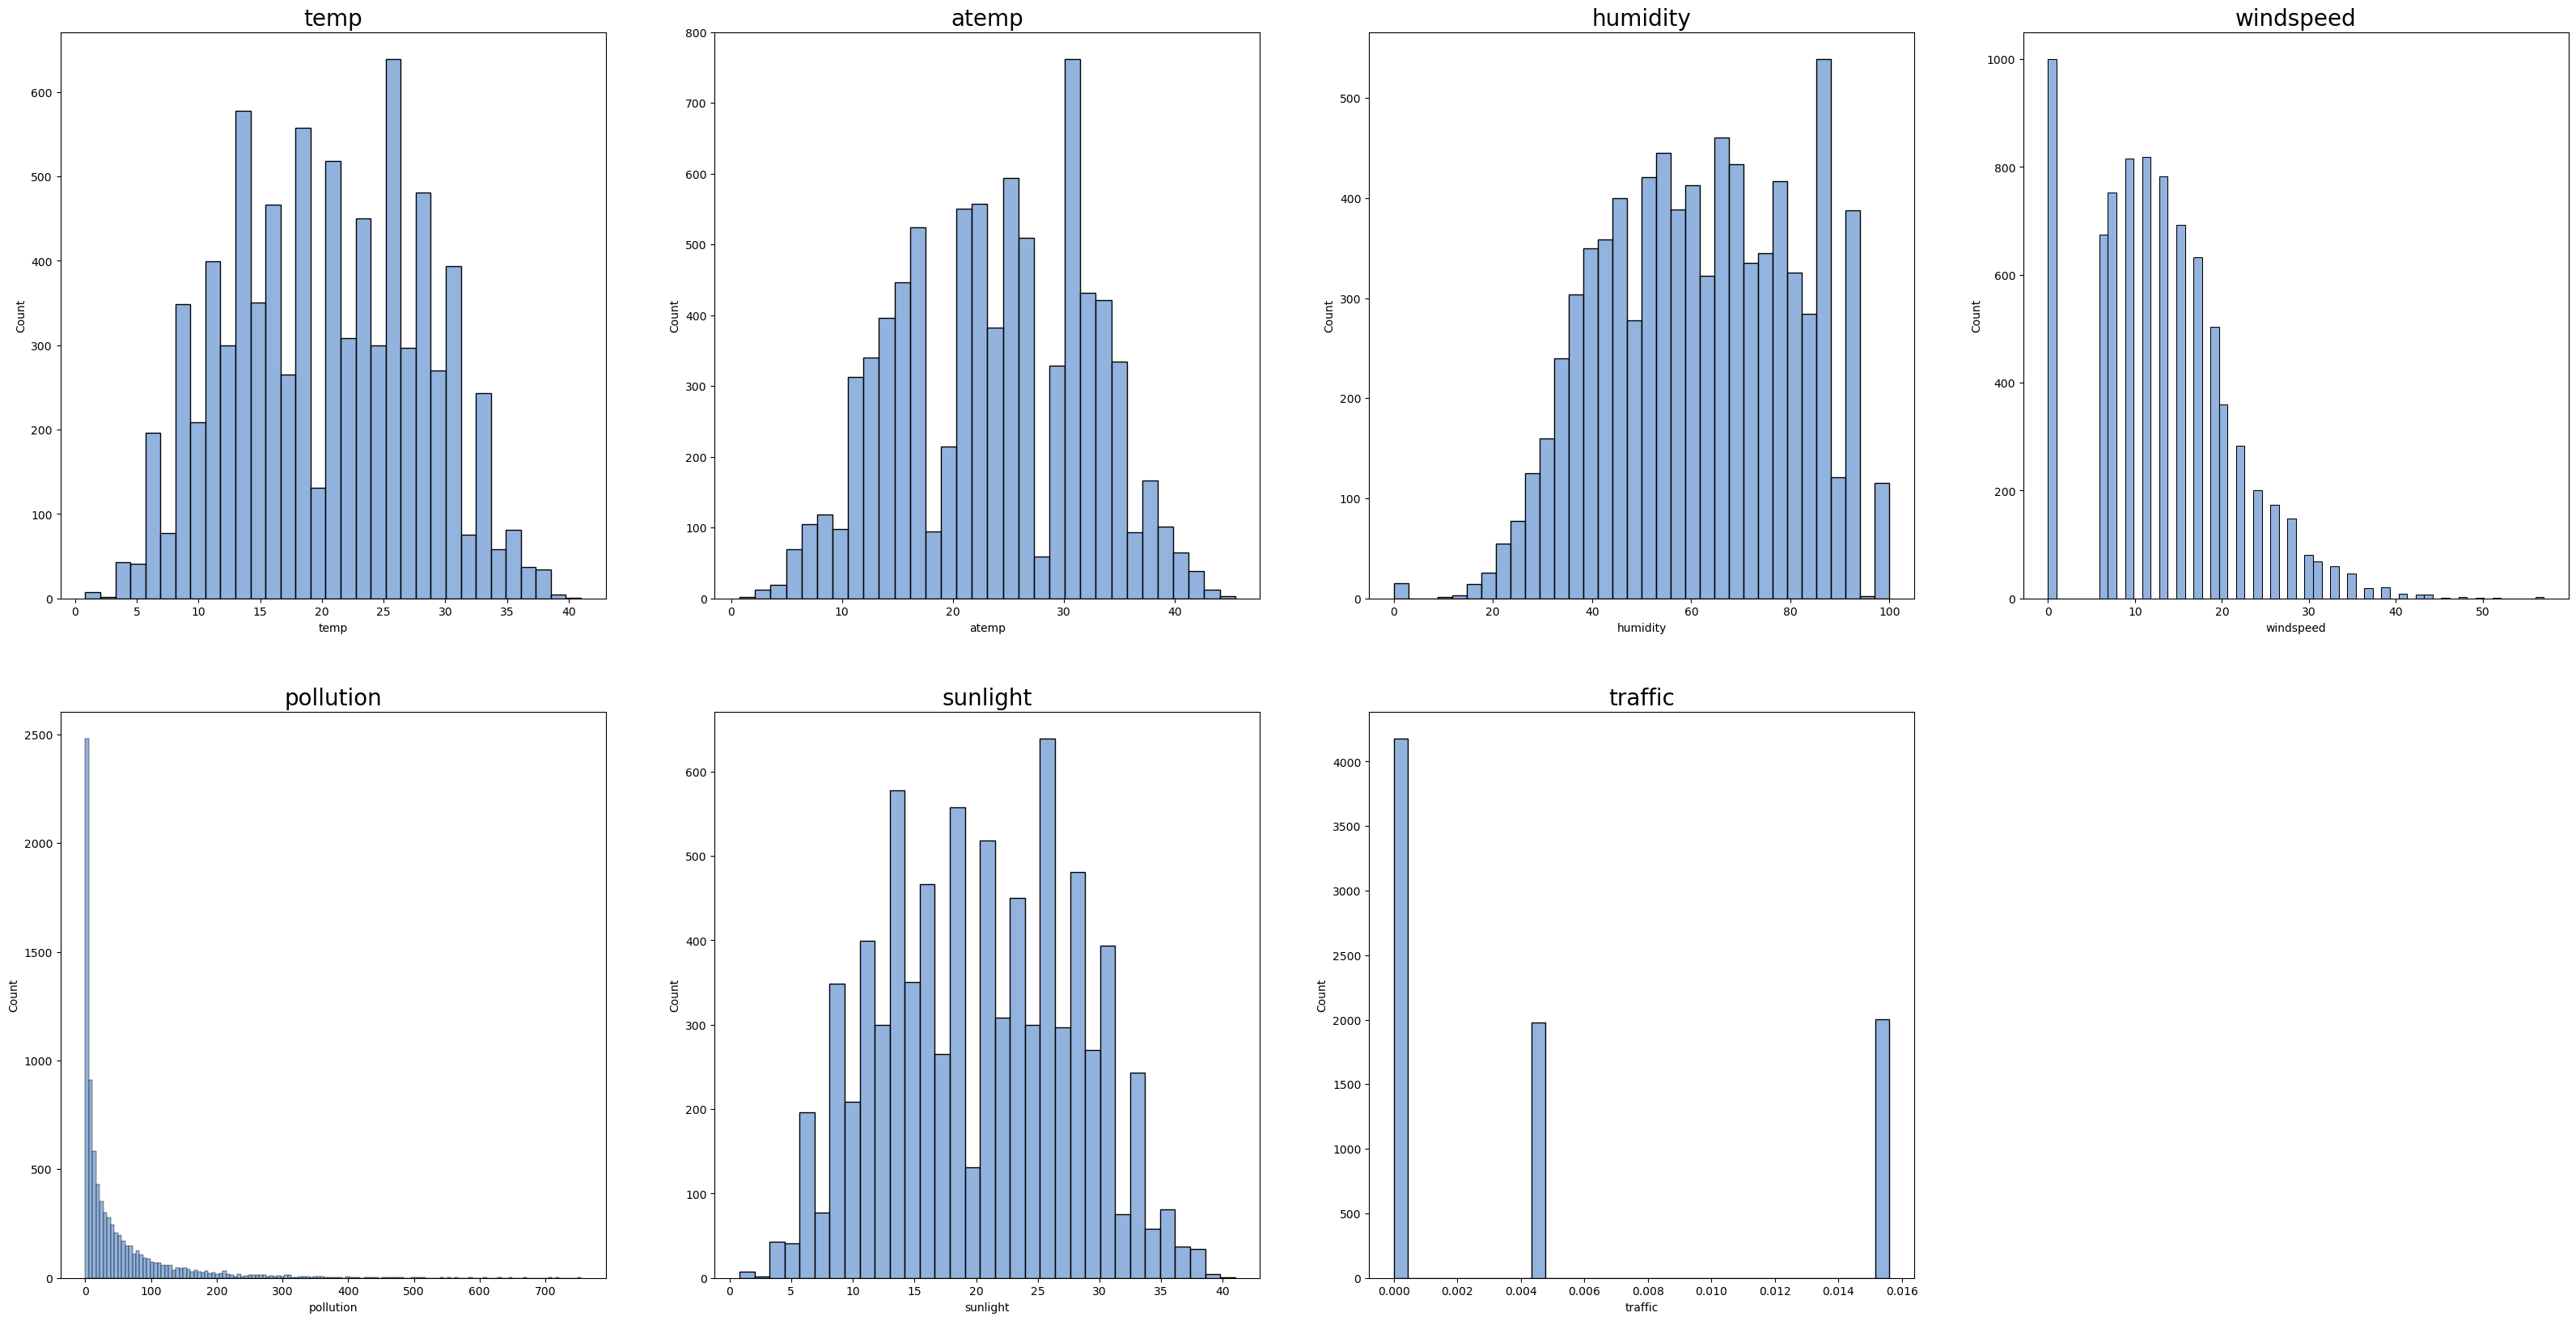

In [8]:
figure, axes = plt.subplots(2, 4, figsize=(40, 20))

for i in range(2):
  for j in range(4):
    if (i==1 and j==3):
      break
    else:
      sns.histplot(train_data[numeric_features[4 * i + j]], ax=axes[i, j], color='#6e9ad4',edgecolor="black").set_title(numeric_features[4 * i + j],fontsize=20)
      
figure.delaxes(axes[1,3])
plt.show()

we can see that none of the numerical features is notably normally distributed, although some of them are close to that (e.g. temp, humidity, sunlight etc.)

###**Distribution of categorial features**

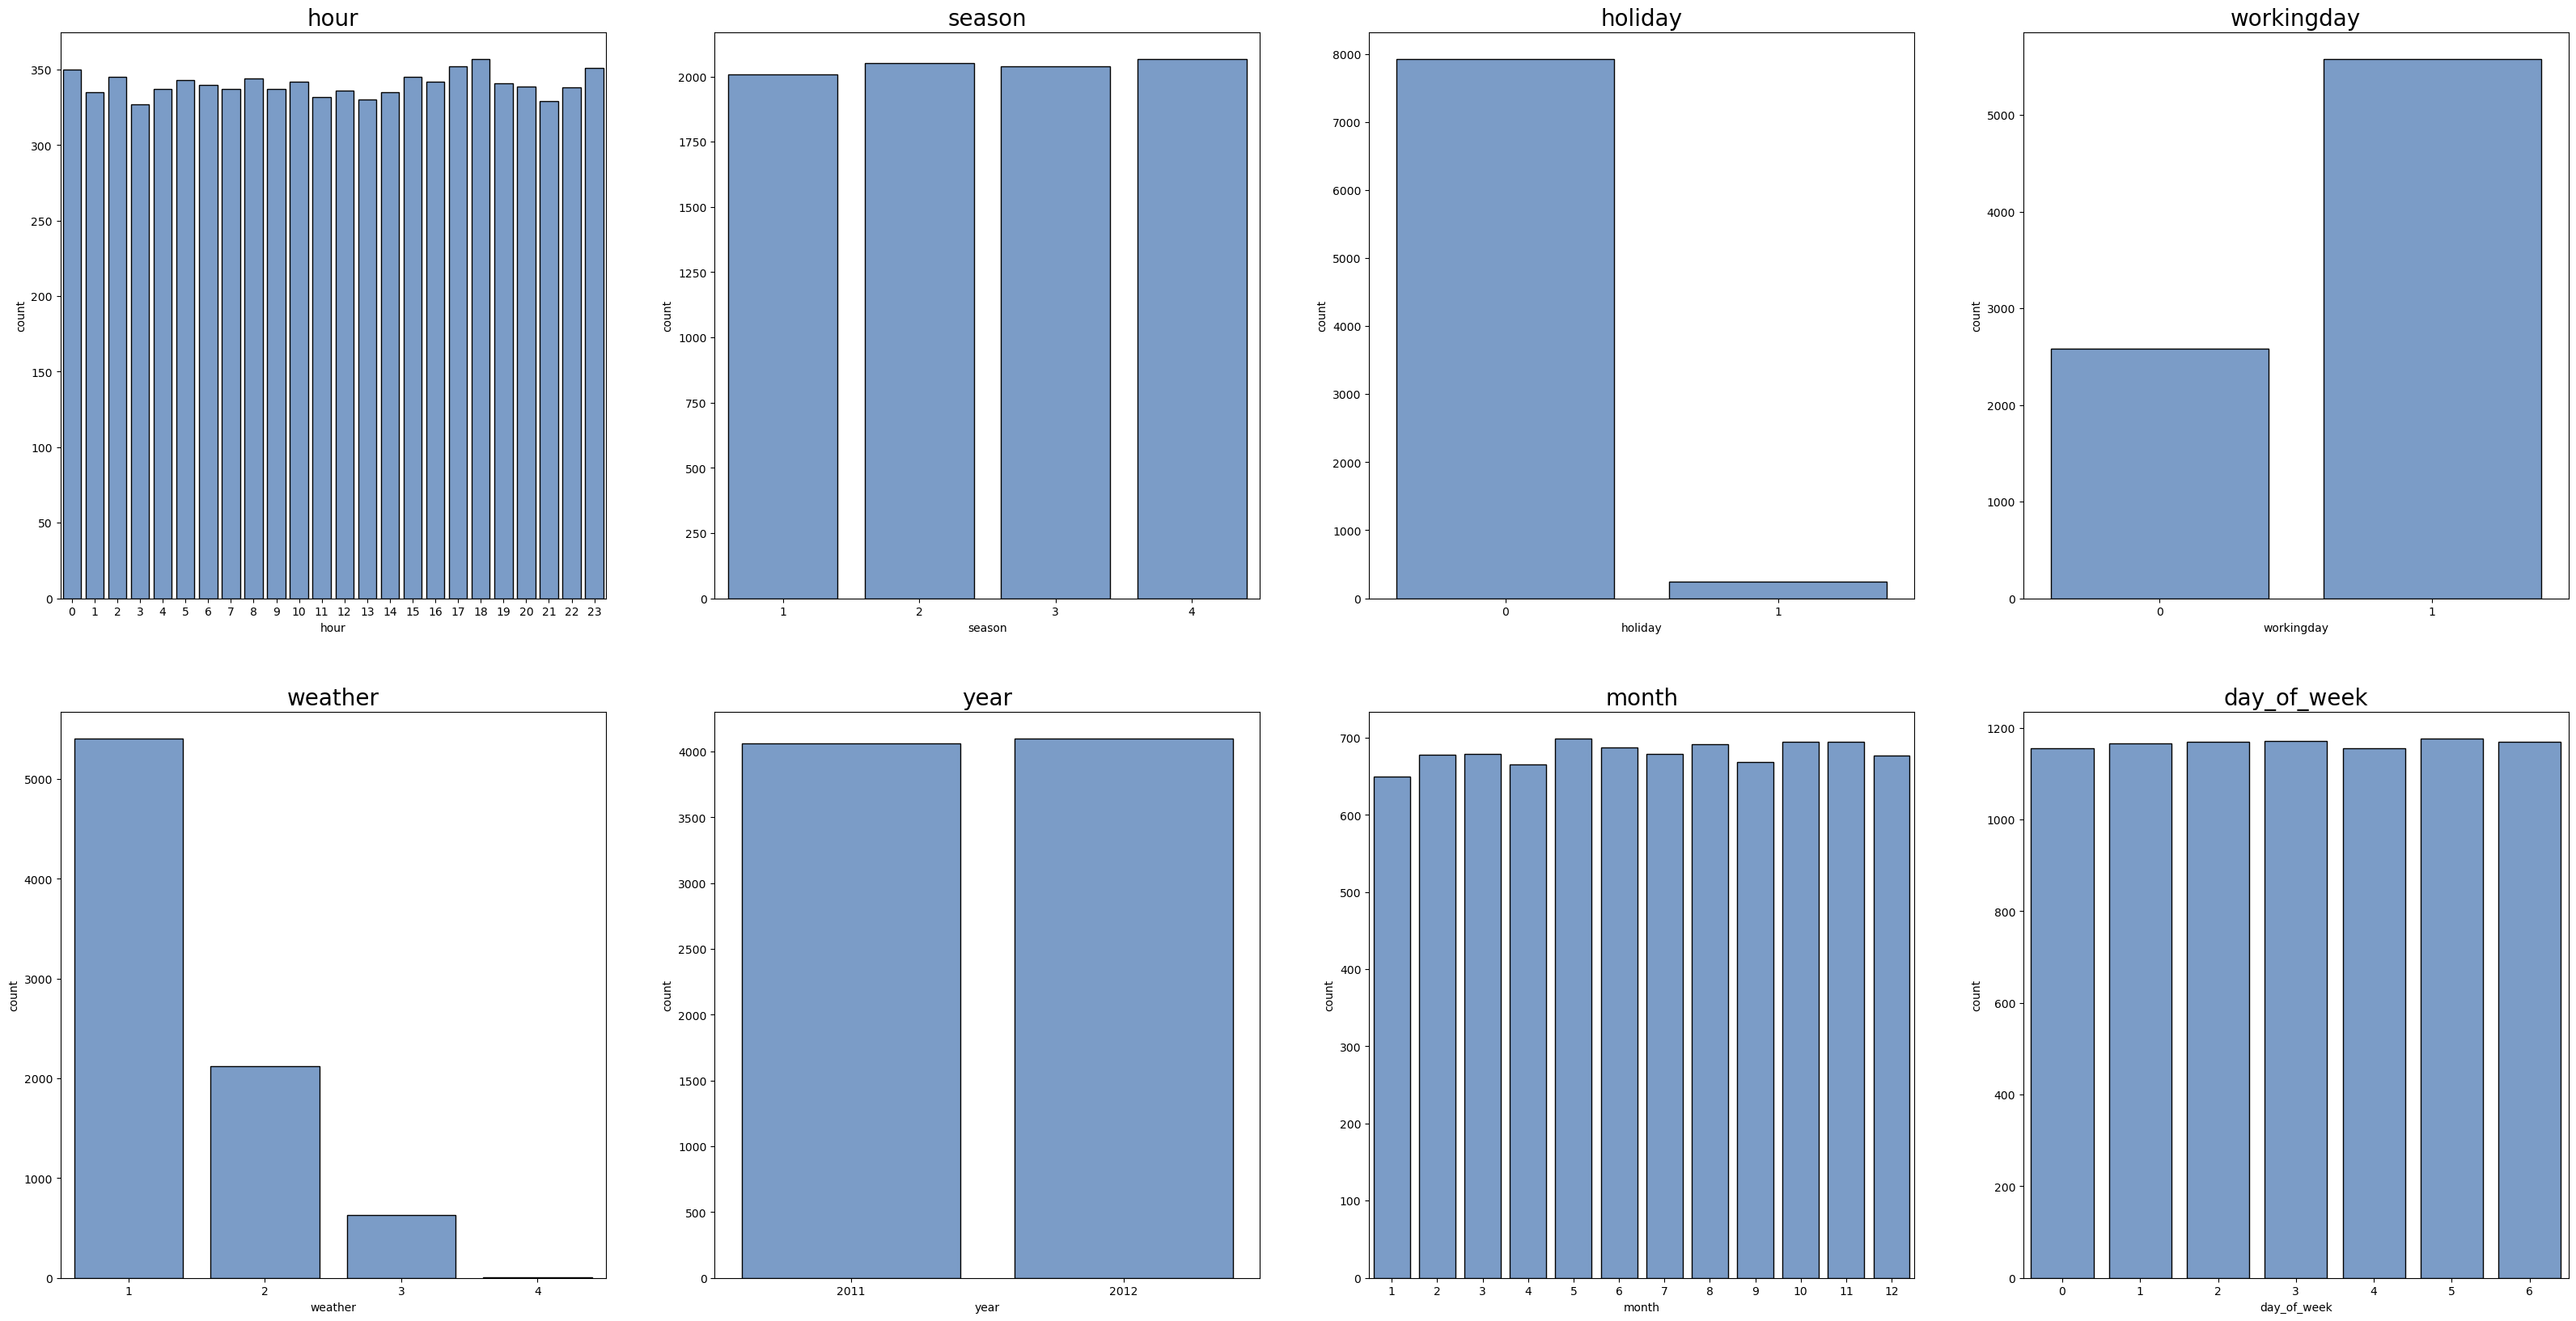

In [9]:
categorical_features = ['hour','season','holiday','workingday', 'weather','year','month', 'day_of_week']
figure, axes = plt.subplots(2, 4, figsize=(40, 20))

for i in range(2):
  for j in range(4):
    sns.countplot(train_data[categorical_features[4 * i + j]], ax=axes[i, j], color='#6e9ad4',edgecolor="black").set_title(categorical_features[4 * i + j],fontsize=20)
plt.show()

We can also look at their pie charts:

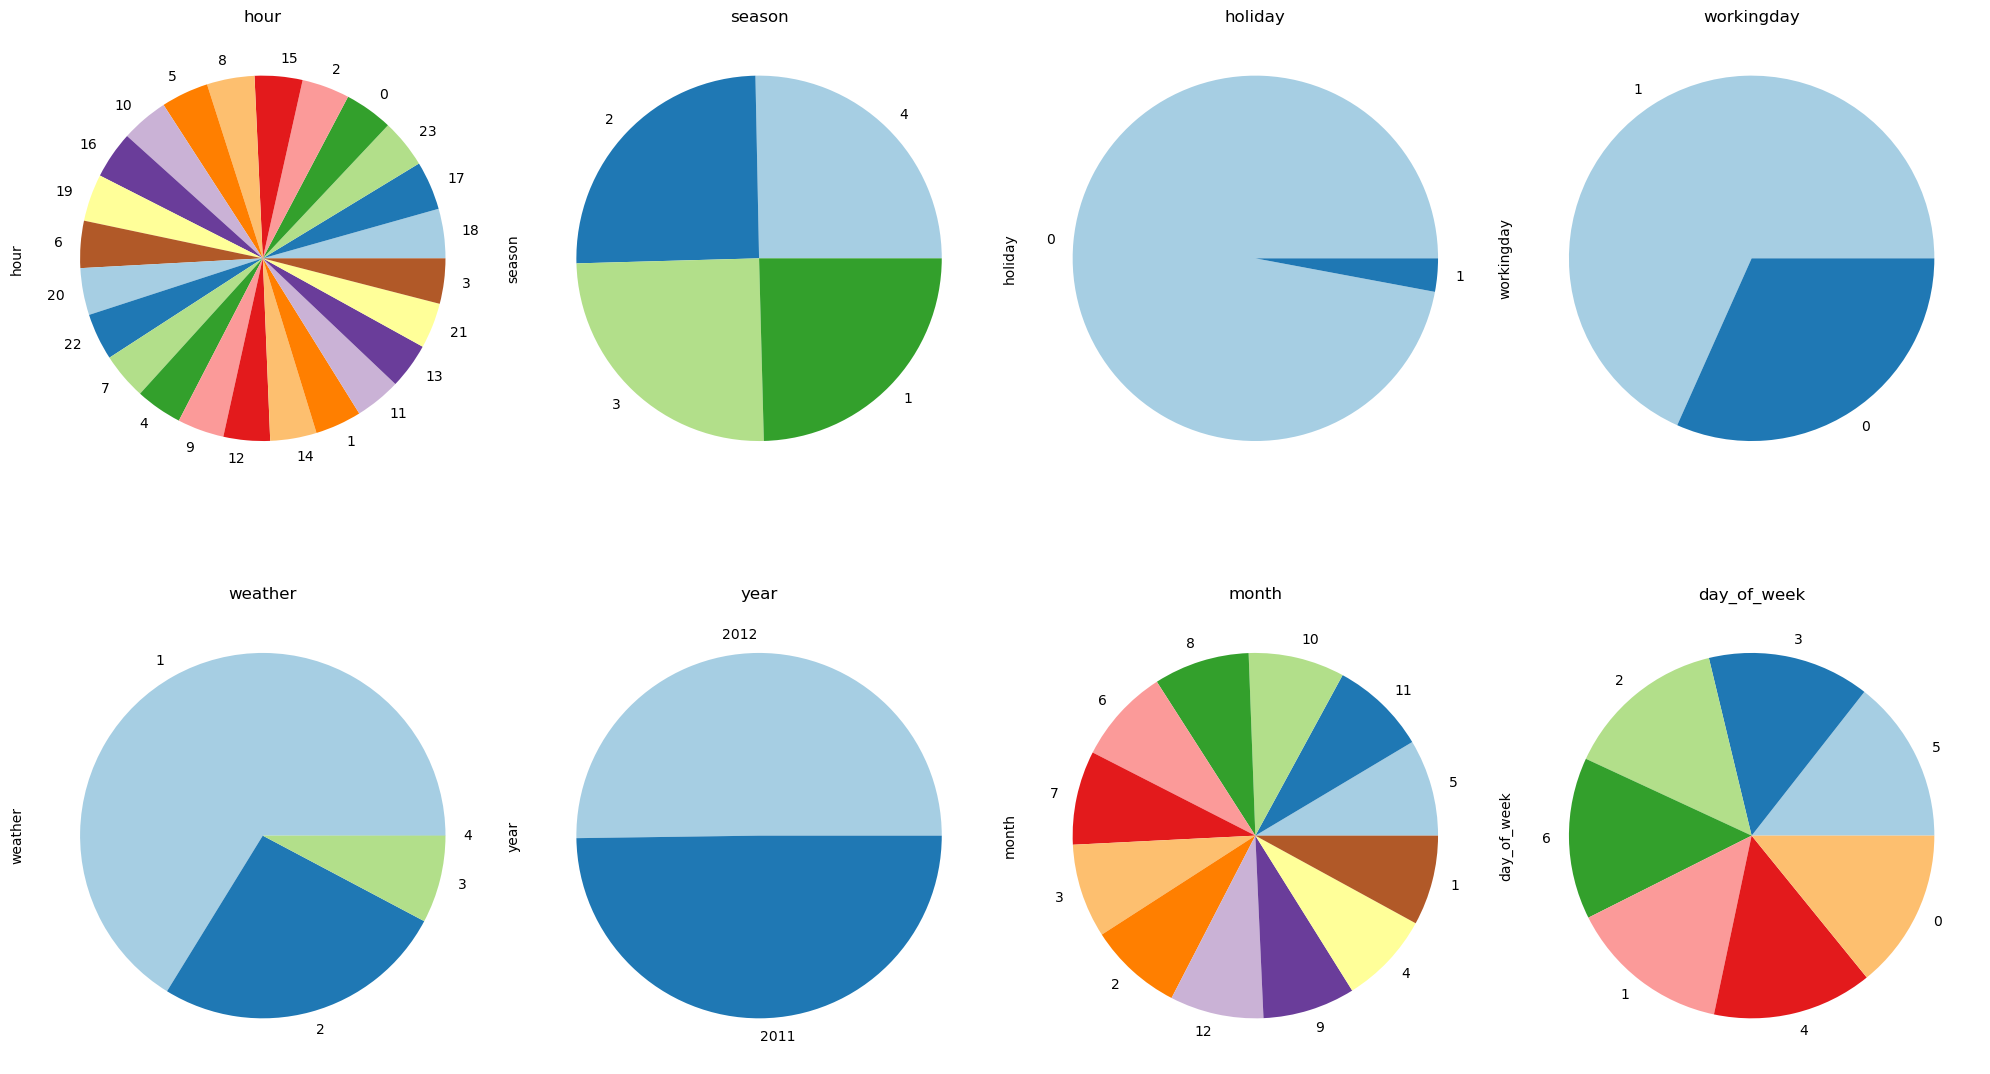

In [10]:
figure, axes = plt.subplots(2, 4, figsize=(20, 20))

colors =sns.color_palette("Paired") #PuBuGn_r

for i in range(2):
  for j in range(4):
    df = train_data[categorical_features[4 * i + j]].value_counts()
    df.plot(kind='pie', title=categorical_features[4 * i + j], colors= colors, ax=axes[i,j])
plt.tight_layout()
figure.subplots_adjust(top=0.7)
plt.show()

We can see that the "seasons" distribute quite equally between the 4 values, same goes for "years" and "months".<br>
The percentage of "holidays" is very low compared to regular days.
Around a third of the samples were taken on non-working days.<br>
Weather types are quite unbalanced, type "1" being the predominant.
By looking at the samples one can see that weathers 2 and 3 occur when there is high relative "humidity", hence these weather types are certainly rain and snow, which both incur high humidity.

###**Rent by - numerical features**

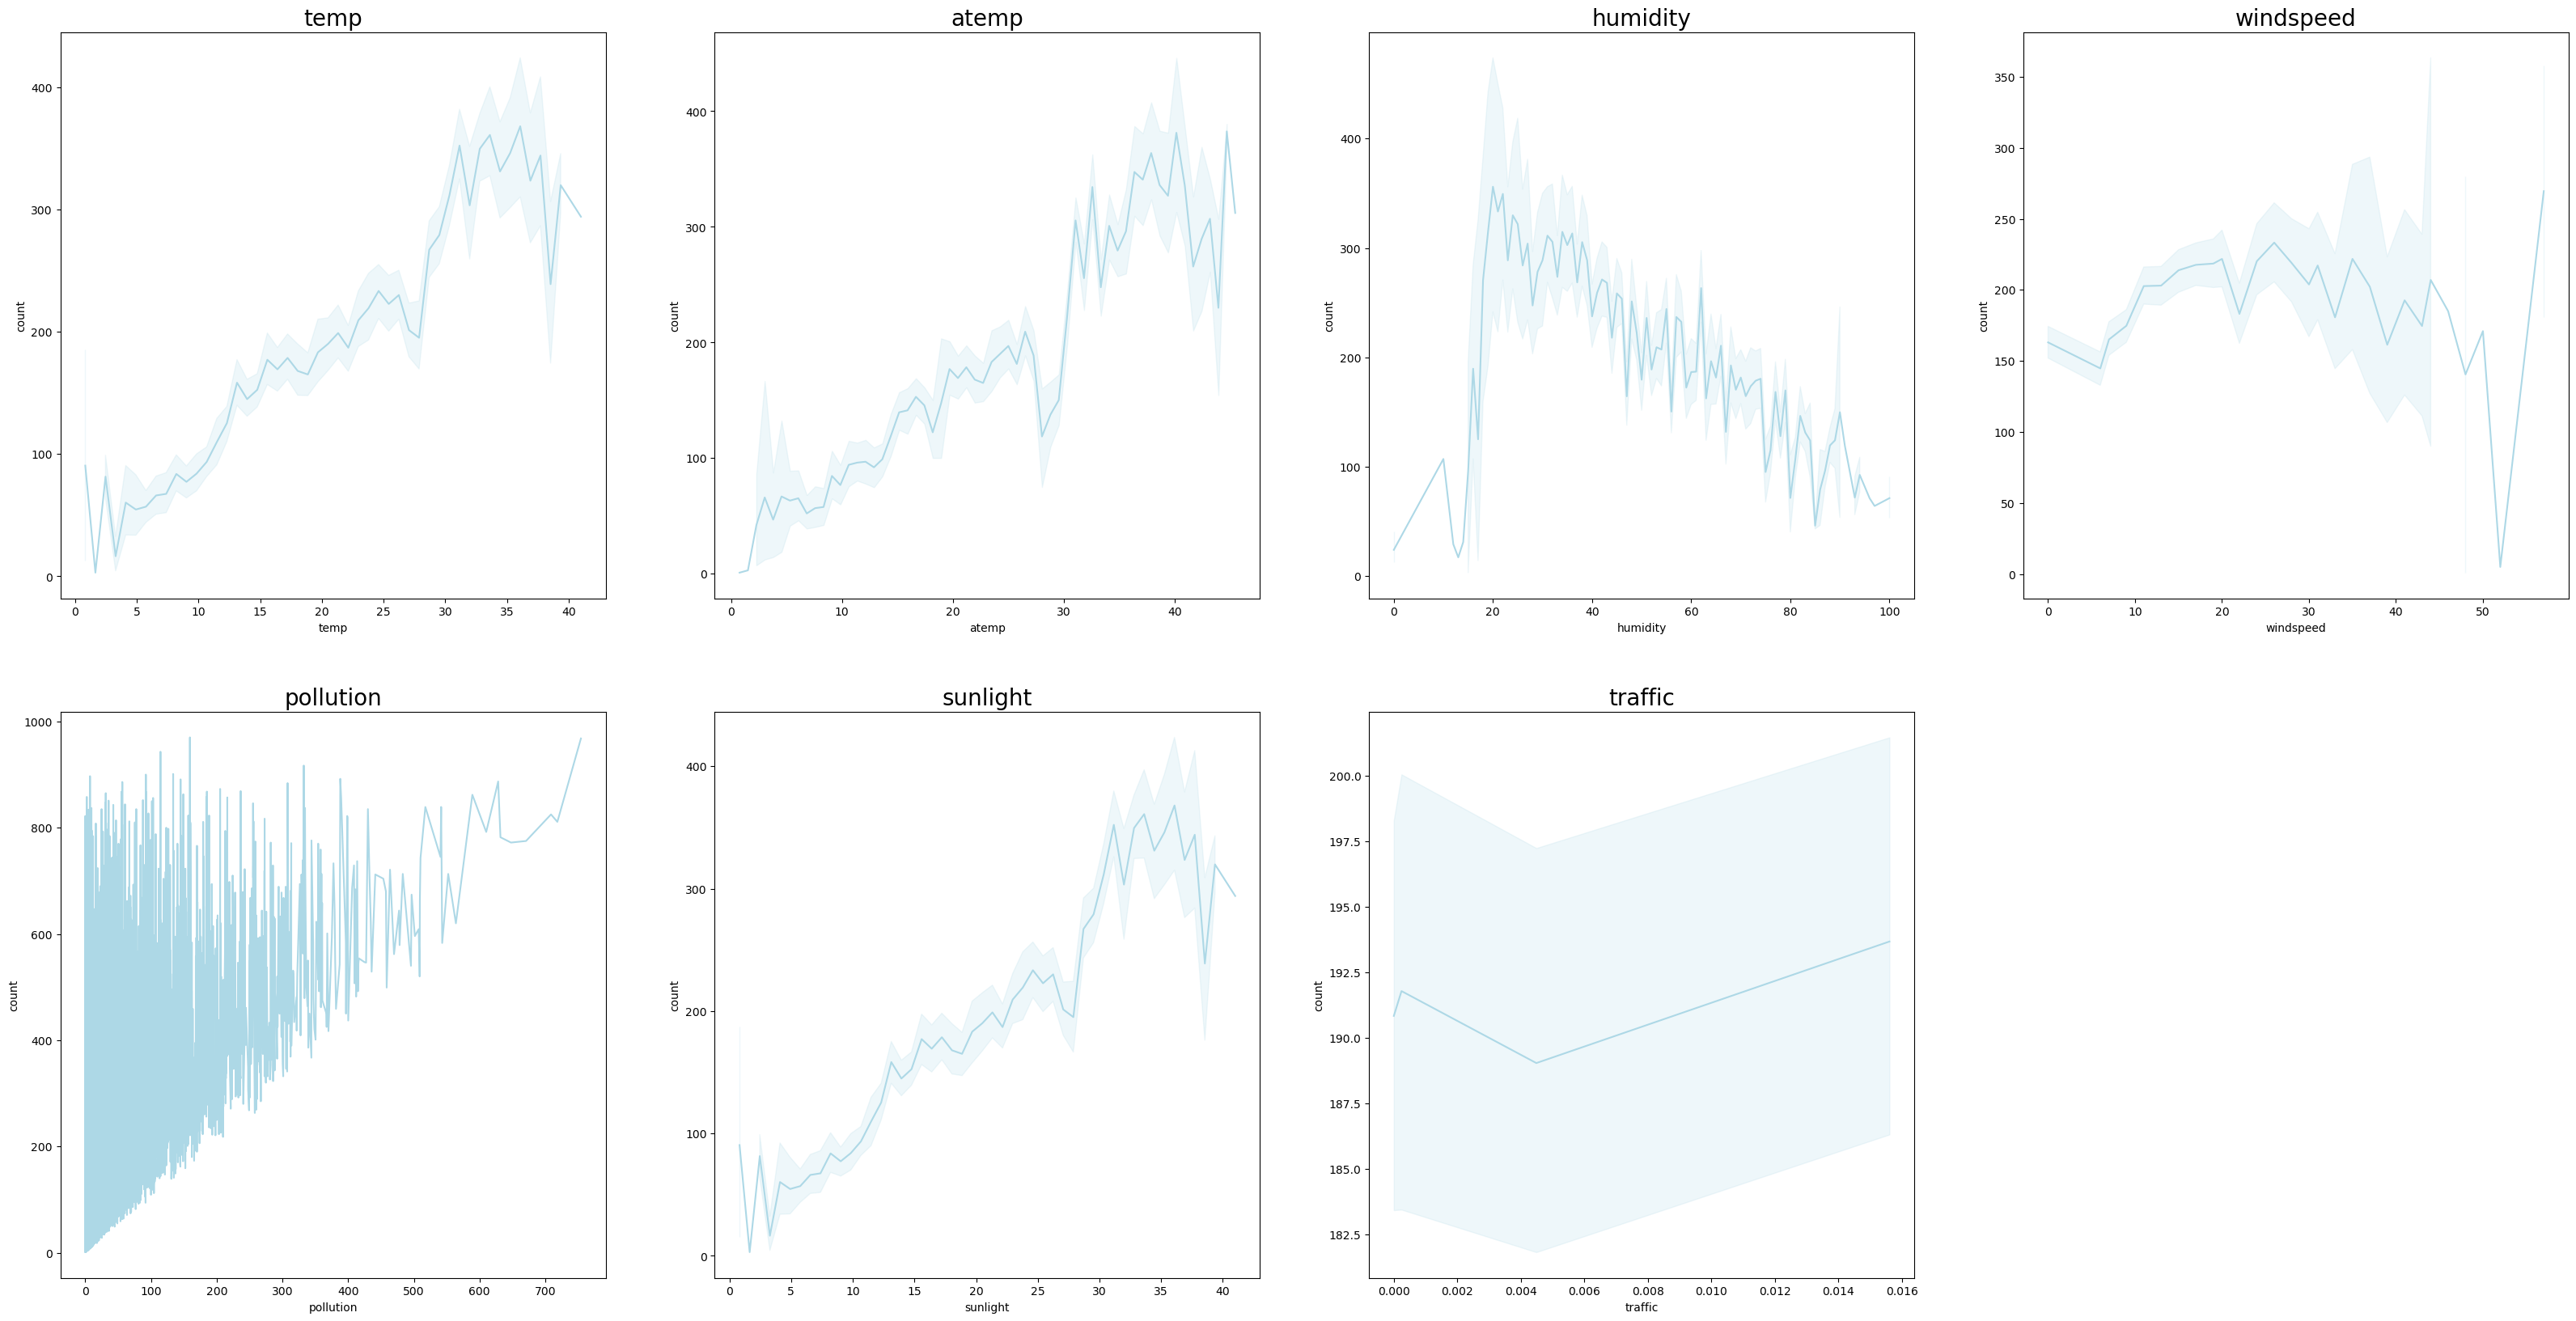

In [11]:
figure, axes = plt.subplots(2, 4, figsize=(40, 20))
f=0
for i in range(2):
  for j in range(4):
    if (i==1 and j==3):
      break
    else:
      feature = numeric_features[f]
      sns.lineplot(data= train_data, x=feature, y='count',  ax=axes[i, j], color='lightblue').set_title(feature, fontsize=20)
      f=f+1
figure.delaxes(axes[1,3])
plt.show()

(note that the line represents the mean per some X and the semi-transparent area represents the range)
* For temp - as the temperatures rise, there is an increase in the number of rentals up to a certain limit, probably when it is too hot, and then we can see a decrease
* For atemp - the same as temp
* For humidity - when the humidity gets really high there is a significant decrease in the number of rentals
* For windspeed - there is no clear trend except when there is very strong wind which may prevent people from renting bikes
* for pollution - there is no clear trend except that the range is narrower at high-pollution times, probably going/returning from work hours, when a steady amount of people rents daily 
* for sunlight - similar to temp
* for traffic - there is no clear trend 

###**Rent by - categorial features**



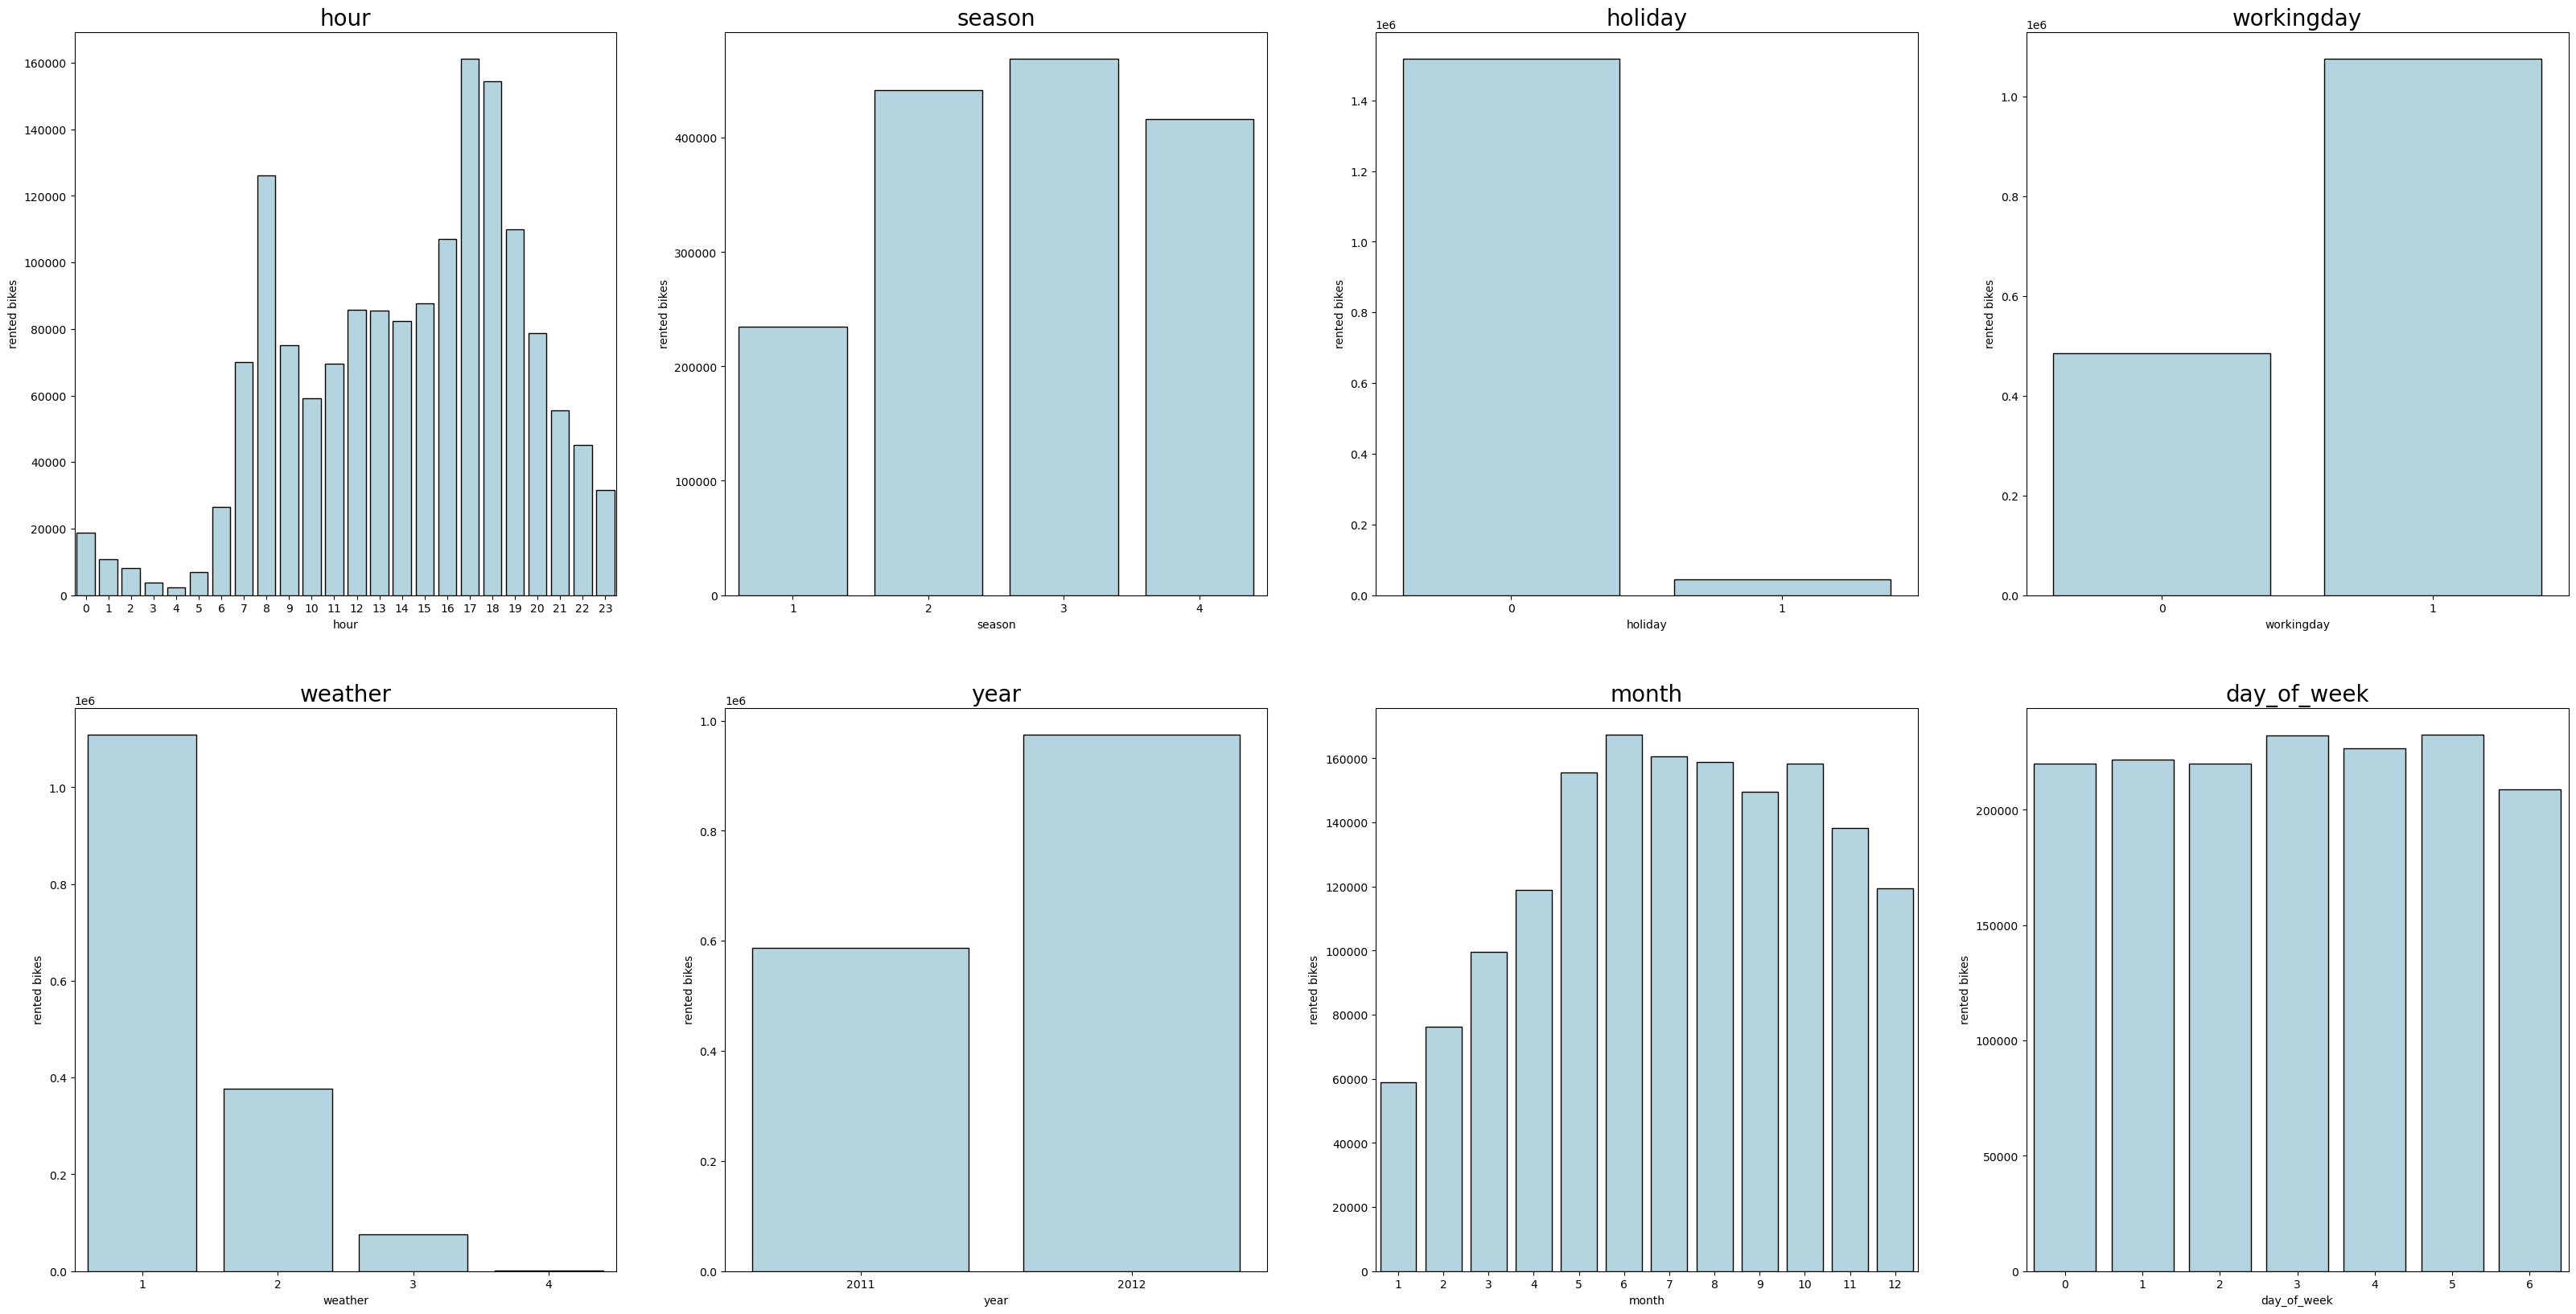

In [12]:
figure, axes = plt.subplots(2, 4, figsize=(40, 20))
f=0
for i in range(2):
  for j in range(4):
    feature = categorical_features[f]
    try_data= pd.DataFrame(train_data.groupby(feature)['count'].sum())
    feature_data = train_data[feature].unique()
    try_data[feature] =sorted(feature_data)
    g = sns.barplot(data=try_data, x=feature, y="count", ax=axes[i, j], color= 'lightblue',edgecolor="black")
    g.set(xlabel=feature, ylabel="rented bikes")
    g.set_title(feature, fontsize=20)
    f=f+1
plt.show()
# in larger numbers, values are normalized to show between 0 and 1

* for hour -  the peak-hours is morning and evening, before work and after work. Based on this, we shall try to categorize groups of hours with similar behaviors.
* for season - In winter (1) people rent less bikes, while in summer (3) and spring (2) the number increases
* for holiday - during vacation there are fewer bicycle rentals
* for workday - Corresponds to the holiday feature, on working days there are more rentals. maybe people are using the bikes to go to work and less for fun.
* for weather - As expected, when the weather is clear (1) most rentals occur and gradually decrease as the weather changes 
* for year - Although there is an identical ratio of data for both years, rentals are more common in 2012. This could be due to new rental companies opening or prices dropping.
* for month - Similar to the weather, in the spring and summer months, the number of rentals is greater
* for day of week - there is no clear trend

##**Preprocessing**

###**Missing values**
As seen in the .info null-count, there are no missing values in the dataset.

###**Handling categorical features**

Some of the features like season, year, day of week are categorical features. In order for the models to work well with these features we would like to preform one hot encoding/dummies or assing a number for each category



In [13]:
def dummies_features (data, feature): # use built in function get_dummies for multiple features
    data = pd.get_dummies(data, columns=feature, drop_first=False)
    return data

train_data = dummies_features(train_data,['year','day_of_week'])

We found out that the seasons correlate with the count, summer being the most favorable and then spring, fall and winter. Thus, we decided to change the numbers 1-4 in that order, saving 3 dimensions.

In [14]:
def reformat_season(data):
  data.loc[data["season"] == 3, "season"] = 5 # keeping summer aside for later
  data.loc[data["season"] == 2, "season"] = 3 # assigning spring to 3
  data.loc[data["season"] == 4, "season"] = 2 # assigning fall to 2
  data.loc[data["season"] == 5, "season"] = 4 # assigning summer to 4
  return data

train_data = reformat_season(train_data)

We attempted dividing hours into groups of hours according to the graph above, in various forms, but all attempts led to lower scores in all models, so we decided to keep hours a numerical feature, even though it is basically categorical:

In [15]:
# def hour_grouping(data):
#   for i in [8,17,18]:
#     data.loc[data["hour"] == i, "hour"] = "peak hours"
#   for i in [7,9,10,11,12,13,14,15,16,19,20,21]:
#     data.loc[data["hour"] == i, "hour"] = "normal hours" 
#   for i in [0,1,2,3,4,5,6,22,23]:
#     data.loc[data["hour"] == i, "hour"] = "slow hours" 
#   return data

In [16]:
# train_data = hour_grouping(train_data)
# train_data = dummies_features(train_data,['hour']) # now that hours is categorical too, we can dummy-fy it

###**Outliers Visualization**

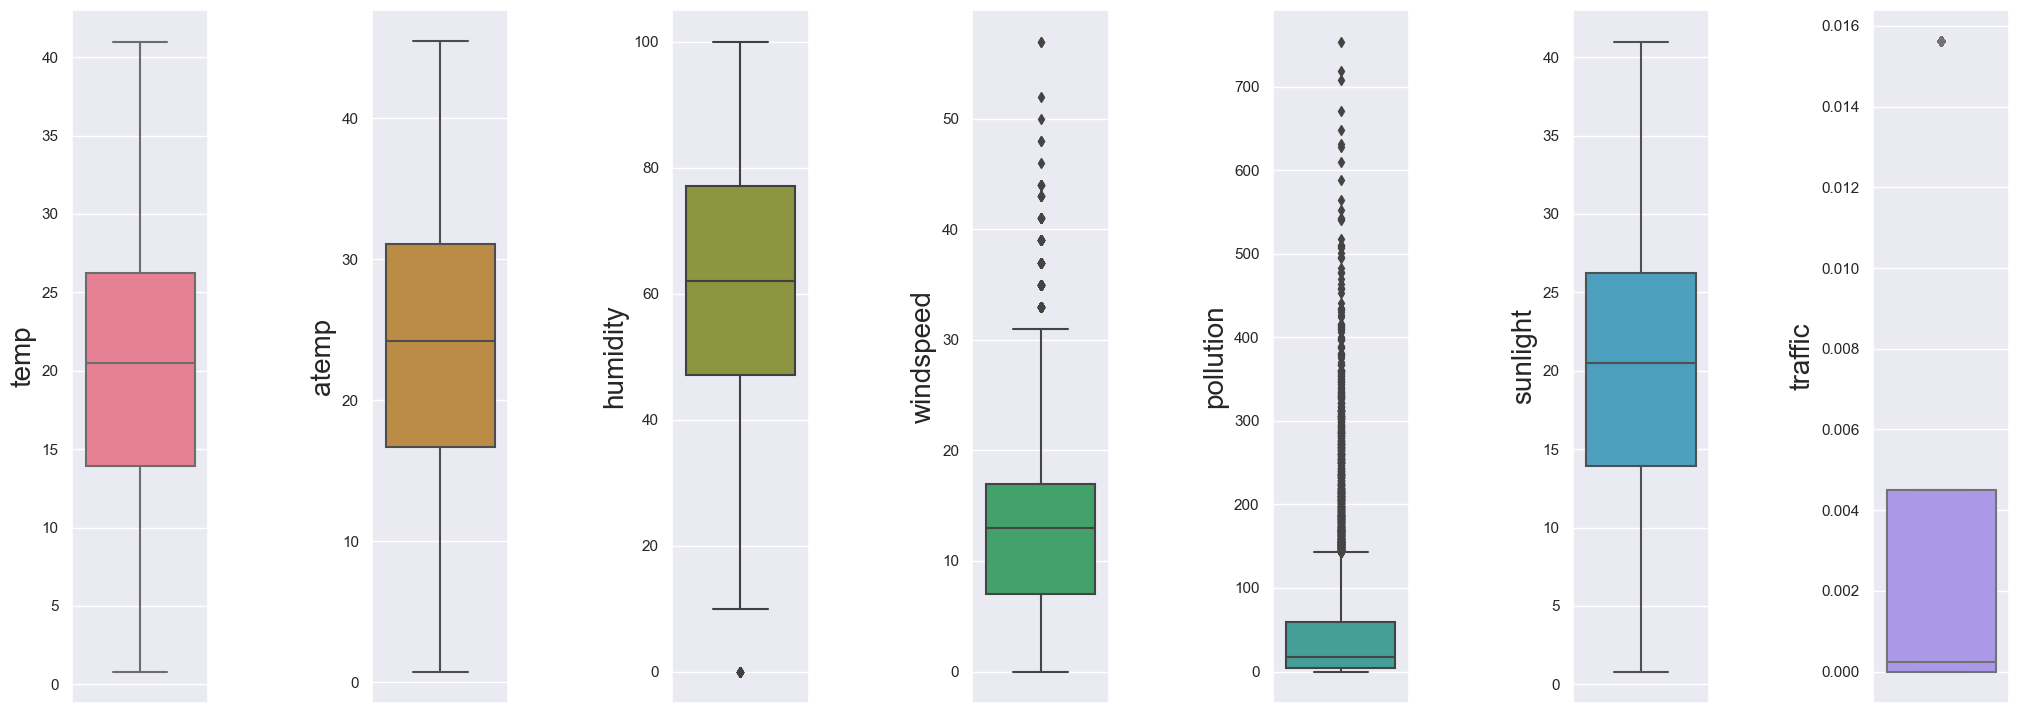

In [17]:
sns.set()
fig, axes = plt.subplots(1, len(numeric_features), figsize = (25,9))
palette_custom = sns.color_palette("husl", 8)
plt.subplots_adjust(wspace = 1.2)

# iterate featrues
for i, column in enumerate(numeric_features):
    sns.boxplot(y=column ,data=train_data, color = palette_custom[i], ax=axes[i]).set_ylabel(column,fontsize=20)

plt.show()

Windspeed and pollution seem to have many outliers. The ridge regression model could be quite sensitive to those, whereas the forest models would be more robust to them. <br>
We would handle the outliers by replacing all the values that are bigger than a threshold value (calculating by 99.5 percentile) to the mean value.

In [18]:
# ouliers removal by thresholds functions
def calc_threshold (df, features, threshold): #calculate the threshold value that keeps desired %
    threshold_dict ={}
    mean_dict = {}
    for feature in features:
        threshold_dict[feature] = df[feature].quantile(threshold)
        mean_dict[feature]=df[feature].mean()
    return threshold_dict, mean_dict


def remove_by_thresholds (df, features,threshold): # fill all the samples that is above the given threshold with the mean
    threshold_dict, mean_dict = calc_threshold (df, features,threshold)
    for feature in threshold_dict.keys():
      df[feature] = np.where(df[feature]>threshold_dict[feature],mean_dict[feature],df[feature])
    return df 

# list of features to remove outliers from with the threshold
features_to_thresholds= ['windspeed', 'pollution']  

#save mean & threshhold dicts for test
threshold_dict_for_test, mean_dict_for_test = calc_threshold (train_data, features_to_thresholds,0.995)

# removing outliers
train_data = remove_by_thresholds(train_data,features_to_thresholds,0.995)

###**New features**

we will try to raise "windspeed" to the power of 2 after seeing it has a 0.06 correlation with "count". 

In [19]:
def interact(df, feature1, feature2, new_col):
  df[new_col] = df[feature1]*df[feature2]
  return df.drop([feature1, feature2], axis=1)

train_data = interact(train_data, "windspeed", "windspeed", "windspeed^2")
train_data.insert(len(train_data.columns)-1, 'count', train_data.pop('count')) # after adding new feature , return the 'count' column to be last

###**Correlation Matrix**


Let's look at the Pearson correlation between the features:

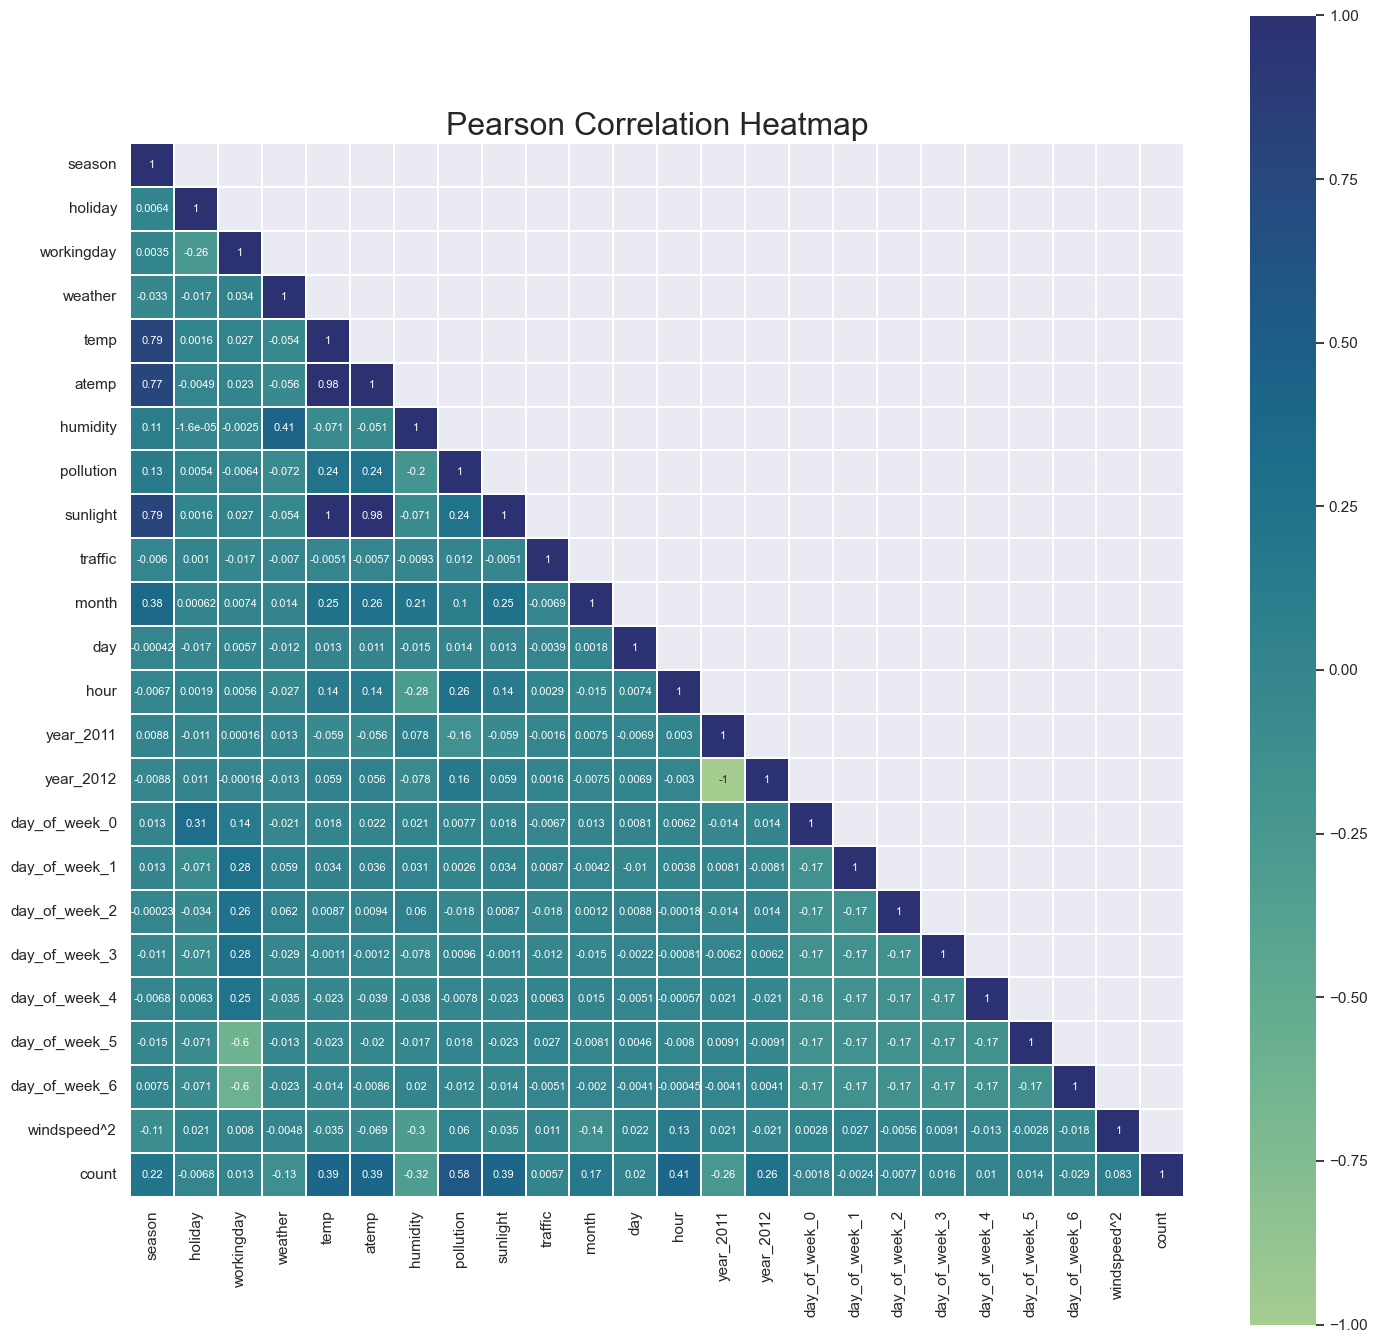

In [20]:
correlations = train_data.corr()
mask = np.zeros_like(correlations, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(17, 17))
plt.title('Pearson Correlation Heatmap', fontsize=23)

sns.heatmap(correlations, linewidths=0.25, vmax=1.0, square=True, cmap="crest",
            linecolor='w', annot=True,annot_kws={"size":8}, mask=mask)
plt.show()

From the correlation matrix we derive that atemp and temp are almost identical, and thus to avoid multicollinearity we decided to remove the temp feature, since atemp represents what the temperature actually feels like.<br><br>
In addition to that, sunlight correlates to atemp almost perfectly, and so we remove it as well.<br><br>
Moreover, we see that mnoths naturally highly correlate with seasons, and thus we decide to remove them.

The main goal in this is to avoid multicollinearity in the data.

In [21]:
def remove_corr_features (data,features_to_remove):
  for feature in features_to_remove:
    data = data.drop([feature], axis=1)
  return data

train_data= remove_corr_features (train_data,['temp','month','sunlight']) 

##**Model selection**

**count** is our target (the number of bicycles that were rented) so we'll split the dataframe to two:

In [22]:
X = train_data.drop(['count'], axis=1)
Y = train_data[['count']]

Now that we have the data, we can proceed to train a model. Given a set of features, our goal is to predict a real number - the number of bikes that will be rented. In other words, this is a regression probelm so we'll only consider regression algorithms.
We'll create a dictionary to save the models:

In [23]:
models = {'Random forest': None,
          'Ridge regression': None,
          'XGBoost': None}

###**Random forest**

In [24]:
def run_random_forest(x_train, y_train):
  rf = RandomForestRegressor(random_state=42)
  tuned_rf = GridSearchCV(estimator=rf, 
                          param_grid={'max_features': ['auto', 'sqrt', 'log2', 1/3], 'n_estimators' : [100,200,250]},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
  tuned_rf.fit(x_train, y_train)
  return tuned_rf

###**Ridge regression**


In [25]:
def run_ridge_regression(x_train, y_train):
  rr = Ridge()
  tuned_rr = GridSearchCV(estimator=rr, 
                          param_grid={'alpha': [0.05, 0.5, 1]},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3)
  tuned_rr.fit(x_train, np.ravel(y_train))
  return tuned_rr

###**XGBoost**

In [26]:
def run_xgboost (x_train, y_train):
  xg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
  tuned_xg = GridSearchCV(estimator=xg, 
                          param_grid={'n_estimators' : [50,100,200],'min_child_weight': [5, 10, 15],
                                      'max_depth': [5, 10 ,15]},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
  tuned_xg.fit(x_train, y_train)
  return tuned_xg

###**Run all models**


In [27]:
def run_all_models(x, y):
  models_dict = {}
  print("\nNow Trying Random Forest:\n")
  models_dict['Random forest'] = run_random_forest(x, y)
  print("\nNow Trying Ridge regression:\n")
  models_dict['Ridge regression'] = run_ridge_regression(x, y)
  print("\nNow Trying XGBoost:\n")
  models_dict['XGBoost'] = run_xgboost(x, y)
  return models_dict

In [28]:
models = run_all_models(X, Y.values.ravel())


Now Trying Random Forest:

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_features=auto, n_estimators=100;, score=-3092.965 total time=   1.5s
[CV 2/3] END max_features=auto, n_estimators=100;, score=-3560.123 total time=   1.5s
[CV 3/3] END max_features=auto, n_estimators=100;, score=-3481.552 total time=   1.6s
[CV 1/3] END max_features=auto, n_estimators=200;, score=-3097.289 total time=   3.2s
[CV 2/3] END max_features=auto, n_estimators=200;, score=-3531.789 total time=   3.0s
[CV 3/3] END max_features=auto, n_estimators=200;, score=-3522.740 total time=   3.1s
[CV 1/3] END max_features=auto, n_estimators=250;, score=-3080.657 total time=   4.0s
[CV 2/3] END max_features=auto, n_estimators=250;, score=-3536.653 total time=   3.9s
[CV 3/3] END max_features=auto, n_estimators=250;, score=-3522.749 total time=   3.8s
[CV 1/3] END max_features=sqrt, n_estimators=100;, score=-6241.034 total time=   0.4s
[CV 2/3] END max_features=sqrt, n_estimators=100;, 

Comparing their cross validation scores:

In [29]:
cv_scores = {}
cv_scores['Random forest'] = models['Random forest'].best_score_
cv_scores['Ridge regression'] = models['Ridge regression'].best_score_
cv_scores['XGBoost'] = models['XGBoost'].best_score_
cv_scores

{'Random forest': -3378.213427651048,
 'Ridge regression': -15995.531080257892,
 'XGBoost': -2346.4487503680584}

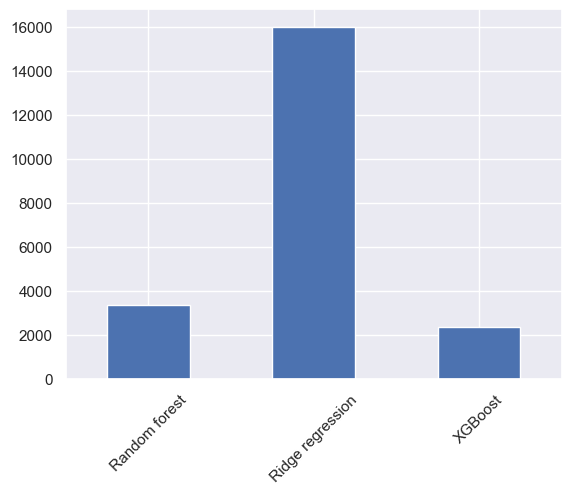

In [30]:
sns.set()
cv_scores_df = -pd.DataFrame.from_dict(cv_scores, orient='index')
cv_scores_df.plot.bar(rot=45, legend=False)
plt.show()

### **Feature importances**

Let's create a dictionary that includes only trained models:

In [31]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models['Random forest'].best_estimator_
trained_models_dict['XGBoost'] = models['XGBoost'].best_estimator_
trained_models_dict['Ridge regression'] = models['Ridge regression'].best_estimator_

Let's find the importance of all features for each model and remove insignificant features:

In [32]:
feature_importance_dict = {}
#for tree based models we can use SKLearn's built-in methods
def find_tree_feature_importance(model, columns): 
  importance = model.feature_importances_
  importance *= 100 / np.max(importance)  # Normalize
  importance = pd.DataFrame(importance, index=columns, columns=["Importance"])
  importance = importance.sort_values(by=['Importance'], ascending=False)
  return importance
  
#One interpetation of feature importance for linear/ridge regression, is the normalized value of the estimator's coefficients:
def find_normalized_lr_feature_importance(model, x_train): 
  coefficients = {x_train.columns[i]: np.abs(model.coef_[i]) for i in range(len(x_train.columns))}
  coefficients_df = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Importance'])
  coefficients_df['Importance'] *=  x_train.std()
  coefficients_df['Importance'] *= 100 / coefficients_df['Importance'].max()
  importance = coefficients_df.sort_values(by=['Importance'], ascending=False)
  return importance

In [33]:
# apply importance functions
feature_importance_dict['Random forest'] = find_tree_feature_importance(trained_models_dict['Random forest'], X.columns)
feature_importance_dict['XGBoost'] = find_tree_feature_importance(trained_models_dict['XGBoost'], X.columns)
feature_importance_dict['Ridge regression'] = find_normalized_lr_feature_importance(trained_models_dict['Ridge regression'], X)

Let's visualize the different feature imprtance across the models:

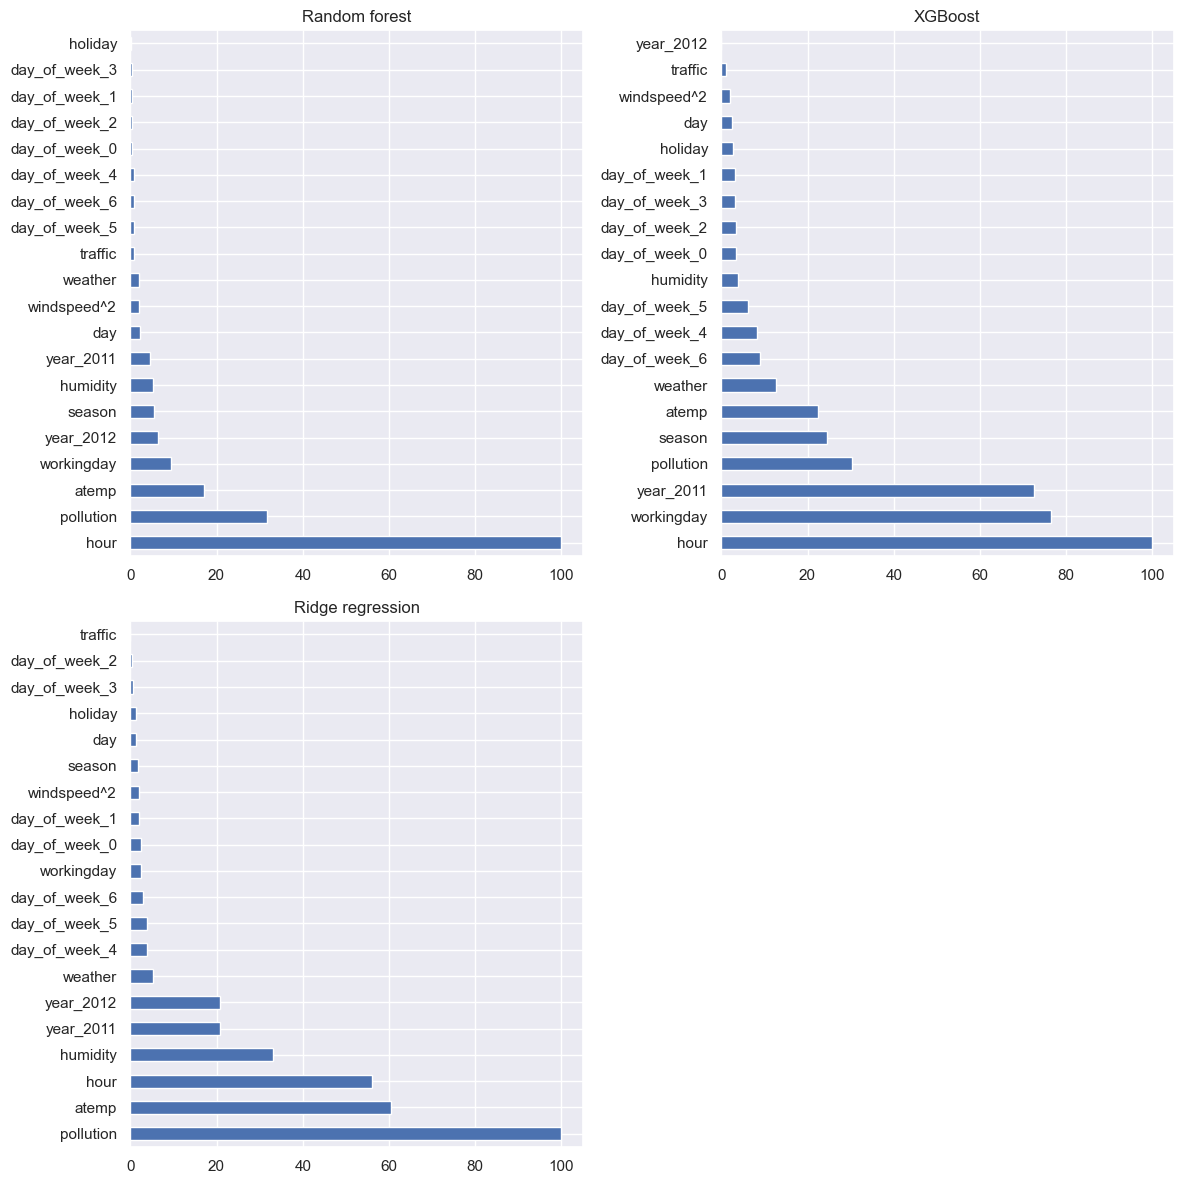

In [34]:
sns.set()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
feature_importance_dict['Random forest'].plot(kind='barh', ax=axes[0, 0], legend=False, title='Random forest')
feature_importance_dict['XGBoost'].plot(kind='barh', ax=axes[0, 1], legend=False, title='XGBoost')
feature_importance_dict['Ridge regression'].plot(kind='barh', ax=axes[1, 0], legend=False, title='Ridge regression')
fig.delaxes(axes[1,1])
plt.tight_layout()
plt.show()

###**Removing weak features**


In [35]:
# creat a dict with the 3 weakest features of the models
weak_features_dict = {}
for k, v in feature_importance_dict.items():
  weak_features_dict[k] = list(v.index.values[-3:])

# creat a dict with the 3 strongest features of the models
strong_features_dict = {}
for k, v in feature_importance_dict.items():
  strong_features_dict[k] = list(v.index.values[:3])

In [36]:
# remove weak features from the train set
x_data_dict = {}
for k, v in weak_features_dict.items():
  x_data_dict[k] = X.drop(v, axis=1)

Let's modify run_all_models to allow us to run on different datasets:



In [37]:
def run_all_models_after_remove(x_dict, y):
  models_dict = {}
  models_dict['Random forest'] = run_random_forest(x_dict['Random forest'], y)
  models_dict['XGBoost'] = run_xgboost(x_dict['XGBoost'], y)
  models_dict['Ridge regression'] = run_ridge_regression(x_dict['Ridge regression'], y)
  return models_dict

In [38]:
models = run_all_models_after_remove(x_data_dict, Y.values.ravel())

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_features=auto, n_estimators=100;, score=-3093.745 total time=   1.4s
[CV 2/3] END max_features=auto, n_estimators=100;, score=-3565.560 total time=   1.5s
[CV 3/3] END max_features=auto, n_estimators=100;, score=-3516.249 total time=   1.5s
[CV 1/3] END max_features=auto, n_estimators=200;, score=-3095.032 total time=   3.0s
[CV 2/3] END max_features=auto, n_estimators=200;, score=-3524.652 total time=   2.9s
[CV 3/3] END max_features=auto, n_estimators=200;, score=-3541.495 total time=   2.8s
[CV 1/3] END max_features=auto, n_estimators=250;, score=-3083.772 total time=   3.8s
[CV 2/3] END max_features=auto, n_estimators=250;, score=-3531.789 total time=   3.8s
[CV 3/3] END max_features=auto, n_estimators=250;, score=-3545.035 total time=   3.9s
[CV 1/3] END max_features=sqrt, n_estimators=100;, score=-5408.522 total time=   0.5s
[CV 2/3] END max_features=sqrt, n_estimators=100;, score=-6399.192 total time= 

Comparing their cross validation scores:

In [39]:
cv_scores_after_remove = {}
cv_scores_after_remove['Random forest'] = models['Random forest'].best_score_
cv_scores_after_remove['Ridge regression'] = models['Ridge regression'].best_score_
cv_scores_after_remove['XGBoost'] = models['XGBoost'].best_score_
cv_scores_after_remove

{'Random forest': -3386.865250547329,
 'Ridge regression': -15990.022867579784,
 'XGBoost': -2251.41382278}

Let's create a dictionary that includes the new trained models:

In [40]:
trained_models_dict_after_remove = {}
trained_models_dict_after_remove['Random forest'] = models['Random forest'].best_estimator_
trained_models_dict_after_remove['XGBoost'] = models['XGBoost'].best_estimator_
trained_models_dict_after_remove['Ridge regression'] = models['Ridge regression'].best_estimator_
trained_models_dict_after_remove

{'Random forest': RandomForestRegressor(n_estimators=250, random_state=42),
 'XGBoost': XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=10, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...),
 'Ridge regression': Ridge(alpha=1)}

##**Evaluate the models on test set**


In [41]:
#preproces test set
def remove_by_thresholds_test (df, features,threshold,threshold_dict, mean_dict): # fill all the samples that is above the given threshold with the mean
    for feature in threshold_dict.keys():
      df[feature] = np.where(df[feature]>threshold_dict[feature],mean_dict[feature],df[feature])
    return df 

def test_Preprocess (test_data,threshold_dict, mean_dict):
  reformat_datetime(test_data)
  test_data = test_data.drop(['datetime'], axis=1) 
  test_data = dummies_features(test_data,['year','day_of_week'])
  test_data = reformat_season(test_data)
  test_data = remove_corr_features (test_data,['temp','month','sunlight'])
  test_data = remove_by_thresholds_test(test_data,features_to_thresholds,0.995,threshold_dict, mean_dict)
  test_data = interact(test_data, "windspeed", "windspeed", "windspeed^2")
  return test_data

test_data = test_Preprocess(test_data,threshold_dict_for_test, mean_dict_for_test)

In [42]:
X_test = test_data.drop(['count'], axis=1)
Y_test = test_data[['count']]

remove weak features from test

In [43]:
x_test_dict = {}
for k, v in weak_features_dict.items():
  x_test_dict[k] = X_test.drop(v, axis=1)

Let's evaluate all models:



In [44]:
def evaluate_single_model(x, y, model):
  y_pred = model.predict(x)
  return np.sqrt(mean_squared_error(y, y_pred))

And create a function that iterates over all models:

In [45]:
def evaluate_all_models(x_dict, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    test_set_scores[k] = evaluate_single_model(x_dict[k], y, v)
  return test_set_scores

In [46]:
test_set_scores = evaluate_all_models(x_test_dict, Y_test, trained_models_dict_after_remove)
test_set_scores

{'Random forest': 47.51501563636826,
 'XGBoost': 41.311335046408814,
 'Ridge regression': 123.56408974354282}

Overall comparison
Let's combine the two dictionaries:

In [47]:
combined_dict = {k: [np.abs(v), test_set_scores[k]] for k, v in cv_scores_after_remove.items()}
combined_dict

{'Random forest': [3386.865250547329, 47.51501563636826],
 'Ridge regression': [15990.022867579784, 123.56408974354282],
 'XGBoost': [2251.41382278, 41.311335046408814]}

In [48]:
scores_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['Train CV score', 'Test set score'])
scores_df['sqrt Train CV score'] = np.sqrt(scores_df['Train CV score'])
column_names = ['Train CV score', 'sqrt Train CV score', 'Test set score']
scores_df = scores_df.reindex(columns=column_names)
scores_df

,Train CV score,sqrt Train CV score,Test set score
Random forest,3386.865251,58.196780,47.515016
Ridge regression,15990.022868,126.451662,123.564090
XGBoost,2251.413823,47.449066,41.311335


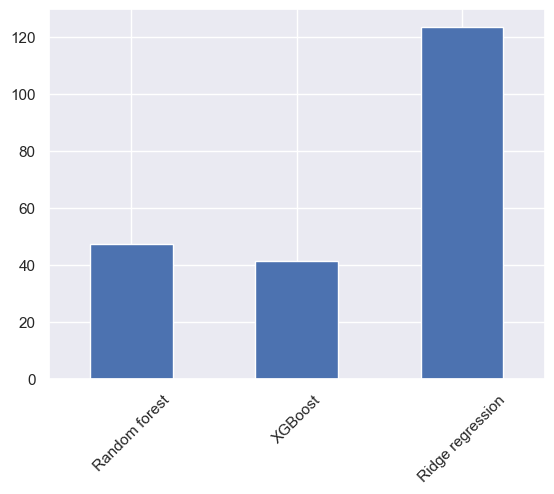

In [49]:
sns.set()
cv_scores_df = pd.DataFrame.from_dict(test_set_scores, orient='index')
cv_scores_df.plot.bar(rot=45, legend=False)
plt.show()

As we can see above, the best model proved to be the XGBoost model. The better score on the test set is explained by having removed the least important features before feeding the model the test set.

##**Provide explainability**

In [50]:
# generate the CSV file:
results = {'model': ['Random Forest', 'XGBoost', 'Ridge Regression'],
           'Score (RMSE)': ['47.51501563636826', '41.311335046408814', '123.56408974354282'],
           'Hyperparams used': [['n_estimators=250', 'random_state=42'], ['base_score=0.5', 'booster=gbtree', 'callbacks=None',
              'colsample_bylevel=1', 'colsample_bynode=1', 'colsample_bytree=1',
              'early_stopping_rounds=None', 'enable_categorical=False',
              'eval_metric=None', 'feature_types=None', 'gamma=0', 'gpu_id=-1',
              'grow_policy=depthwise', 'importance_type=None',
              'learning_rate=0.300000012', 'max_bin=256',
              'max_cat_threshold=64', 'max_cat_to_onehot=4', 'max_delta_step=0',
              'max_depth=10', 'max_leaves=0', 'min_child_weight=10', 'missing=nan',
              'monotone_constraints=()', 'n_estimators=100', 'n_jobs=0',
              'num_parallel_tree=1', 'predictor=auto', 'random_state=42'], ['alpha=1']],
           'Features dropped': [['holiday', 'day_of_week_3', 'day_of_week_2'], ['year_2012', 'traffic', 'windspeed^2'], ['traffic','day_of_week_2','day_of_week_3']], # not including features we dropped globally stated above
           'New features created': [['day of week dummies', 'year dummies', 'windspeed^2'], ['day of week dummies', 'year dummies', 'windspeed^2'], ['day of week dummies', 'year dummies', 'windspeed^2']],
           'Runtime trainining + inference (seconds)': ['1.3', '0.2', '0.0'], # not including grid search, only best estimator
           'Hardware used (GPU/CPU/TPU)': ['Local CPU i7-12700K boosted', 'Local CPU i7-12700K boosted', 'Local CPU i7-12700K boosted'],
           'Explainability (top 3 features)': [['hour', 'pollution', 'atemp'], ['hour', 'workingday', 'year_2011'], ['pollution', 'atemp', 'hour']]
           }

df = pd.DataFrame(results)
df

,model,Score (RMSE),Hyperparams used,Features dropped,New features created,Runtime trainining + inference (seconds),Hardware used (GPU/CPU/TPU),Explainability (top 3 features)
0,Random Forest,47.51501563636826,"[n_estimators=250, random_state=42]","[holiday, day_of_week_3, day_of_week_2]","[day of week dummies, year dummies, windspeed^2]",1.3,Local CPU i7-12700K boosted,"[hour, pollution, atemp]"
1,XGBoost,41.311335046408814,"[base_score=0.5, booster=gbtree, callbacks=Non...","[year_2012, traffic, windspeed^2]","[day of week dummies, year dummies, windspeed^2]",0.2,Local CPU i7-12700K boosted,"[hour, workingday, year_2011]"
2,Ridge Regression,123.56408974354282,[alpha=1],"[traffic, day_of_week_2, day_of_week_3]","[day of week dummies, year dummies, windspeed^2]",0.0,Local CPU i7-12700K boosted,"[pollution, atemp, hour]"


In [51]:
df.to_csv(os.path.join(os.getcwd(), 'exercise1.csv'))